In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
    import pandas as pd
    
    file_path = r'C:\Users\reshm\OneDrive\Desktop\AAPL Stock Data (2007-2023)\AAPL, 1D 01012007-12072023.csv'
    
    aapl_data = pd.read_csv(file_path)
    
    print(aapl_data.head())


         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578  


In [22]:
print(aapl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB
None


In [23]:
print(aapl_data.isnull().sum())


volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


In [24]:
print(aapl_data.dtypes)

volume          float64
vwap            float64
open            float64
close           float64
high            float64
low             float64
time              int64
transactions      int64
dtype: object


In [25]:
print(aapl_data.columns)


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions'],
      dtype='object')


In [26]:
# Check the frequency of the time series
data_freq = aapl_data.index.to_series().diff().mode()[0]
print(f"Frequency of the time series: {data_freq}")


Frequency of the time series: 1.0


In [27]:
import pandas as pd
import mplfinance as mpf

# Load the dataset
file_path = r'C:\Users\reshm\OneDrive\Desktop\AAPL Stock Data (2007-2023)\AAPL, 1D 01012007-12072023.csv'
aapl_data = pd.read_csv(file_path)

# Convert 'time' column to datetime and set it as index
aapl_data['time'] = pd.to_datetime(aapl_data['time'], unit='s')  # Convert from Unix timestamp
aapl_data.set_index('time', inplace=True)

# Ensure columns are properly named
aapl_data = aapl_data[['open', 'high', 'low', 'close']]  # Use the column names as provided


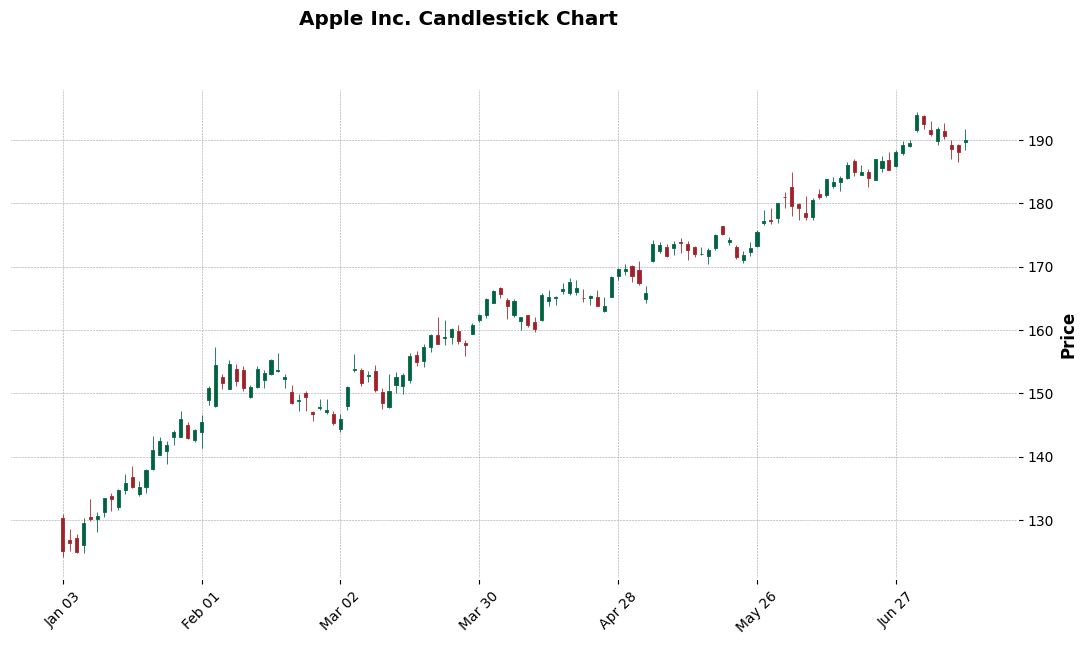

In [28]:
# Select a subset of data for plotting
start_date = '2023-01-01'
end_date = '2023-12-31'
subset_data = aapl_data[start_date:end_date]

# Create the candlestick chart with the subset of data
mpf.plot(subset_data, type='candle', style='charles', title='Apple Inc. Candlestick Chart',
         ylabel='Price', figsize=(14, 7))


In [29]:
# Compute summary statistics for available columns
summary_stats = aapl_data[['open', 'high', 'low', 'close']].agg(['mean', 'median', 'std'])
print(summary_stats)


             open       high        low      close
mean    46.362788  46.881127  45.865790  46.396058
median  25.775000  26.262800  25.680000  25.825000
std     50.235593  50.843874  49.680104  50.293482


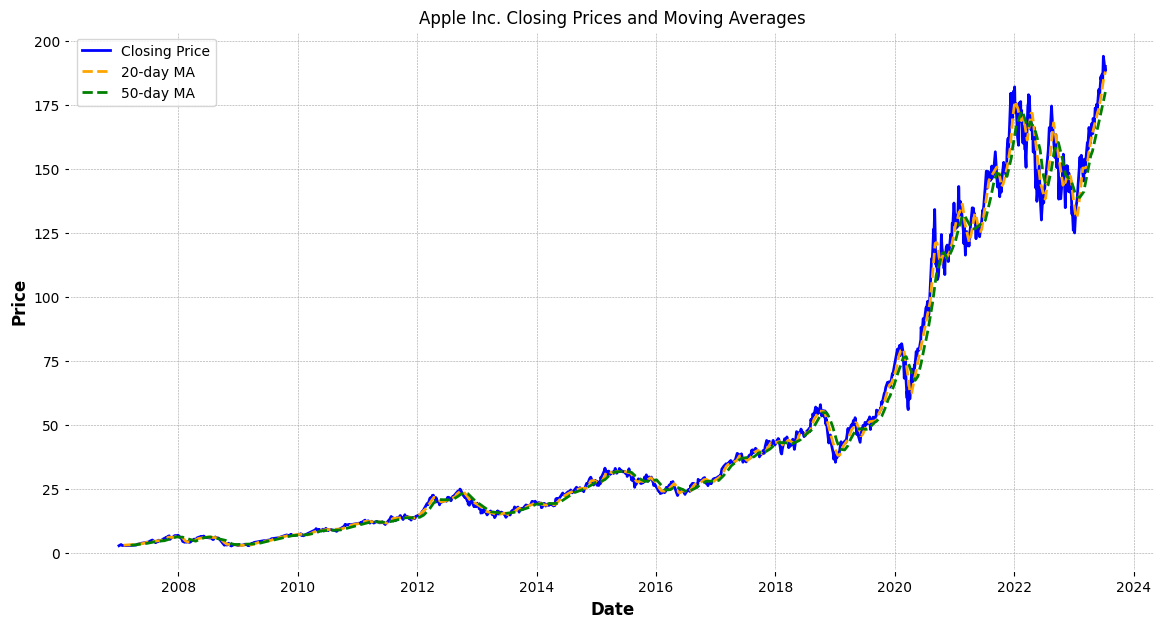

In [30]:
# Calculate moving averages
aapl_data['20-day MA'] = aapl_data['close'].rolling(window=20).mean()
aapl_data['50-day MA'] = aapl_data['close'].rolling(window=50).mean()

# Plot closing prices and moving averages
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(aapl_data.index, aapl_data['close'], label='Closing Price', color='blue')
plt.plot(aapl_data.index, aapl_data['20-day MA'], label='20-day MA', color='orange', linestyle='--')
plt.plot(aapl_data.index, aapl_data['50-day MA'], label='50-day MA', color='green', linestyle='--')
plt.title('Apple Inc. Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Explanation:
20-day MA: Short-term trend indicator that responds quickly to price changes.
50-day MA: Medium-term trend indicator, useful for identifying sustained trends.
Plotting: Visualizes the relationship between the actual closing prices and the smoothed trends (MAs). 
Insights:
Trend Identification: The plot highlights periods where the stock was either in an uptrend or downtrend, based on the moving averages. Crossovers (e.g., when the 20-day MA crosses above the 50-day MA) can indicate potential buy or sell signals.


In [31]:
# Extract the year from the index
aapl_data['year'] = aapl_data.index.year

# Calculate the average closing price per year
yearly_avg_close = aapl_data.groupby('year')['close'].mean()

# Print the average closing price per year
print(yearly_avg_close)


year
2007      4.581222
2008      5.070867
2009      5.243364
2010      9.280176
2011     13.000154
2012     20.573207
2013     16.879816
2014     23.066142
2015     30.009967
2016     26.151002
2017     37.637764
2018     47.263357
2019     52.063983
2020     95.346759
2021    140.989325
2022    154.835060
2023    162.474999
Name: close, dtype: float64


In [32]:
from scipy import stats

# Extract data for the two years to compare
data_2020 = aapl_data[aapl_data['year'] == 2020]['close']
data_2021 = aapl_data[aapl_data['year'] == 2021]['close']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(data_2020, data_2021)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -27.588815162673935
P-value: 1.0073157969913293e-102


In [33]:
# Calculate daily returns
aapl_data['daily_return'] = aapl_data['close'].pct_change()

# Drop missing values created by pct_change
daily_returns = aapl_data['daily_return'].dropna()

# Print summary statistics for daily returns
print(daily_returns.describe())


count    4158.000000
mean        0.001203
std         0.020209
min        -0.179192
25%        -0.008124
50%         0.000995
75%         0.011662
max         0.139076
Name: daily_return, dtype: float64


In [34]:
# Perform the Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(daily_returns)

print(f"Shapiro-Wilk Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")


Shapiro-Wilk Statistic: 0.940666076855671
P-value: 6.180858977992611e-38


Index(['open', 'high', 'low', 'close', '20-day MA', '50-day MA', 'year',
       'daily_return'],
      dtype='object')


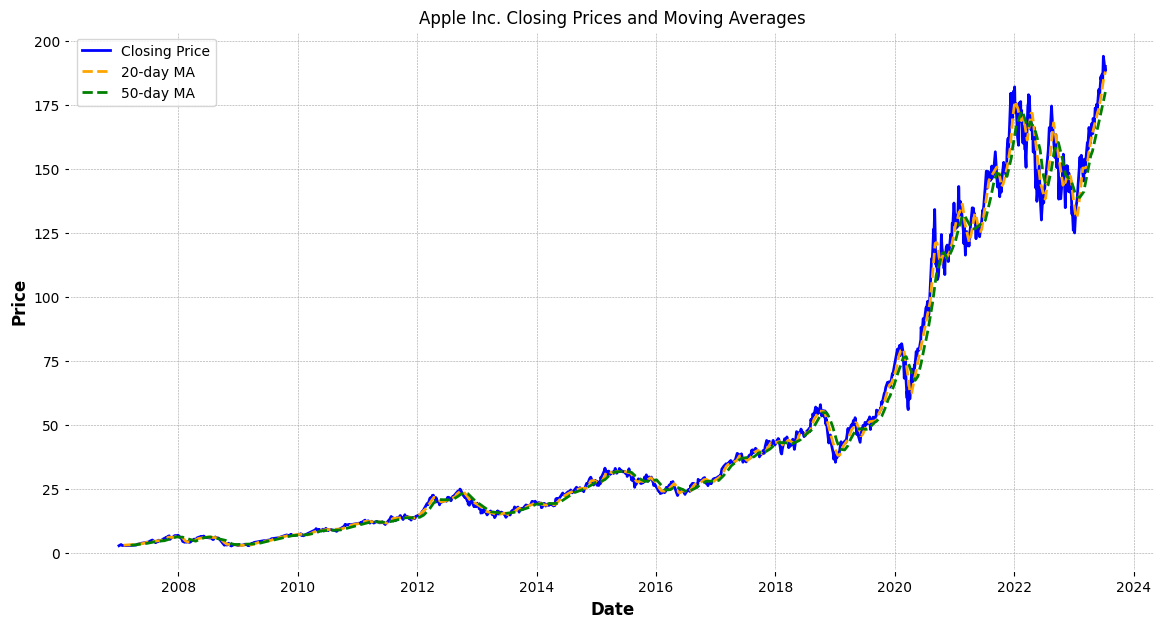

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check column names
print(aapl_data.columns)

# Convert closing prices to a NumPy array
close_prices = aapl_data['close'].values

# Define the window size for moving averages
window_size_20 = 20
window_size_50 = 50

# Create the moving average windows
weights_20 = np.ones(window_size_20) / window_size_20
weights_50 = np.ones(window_size_50) / window_size_50

# Compute moving averages using convolution
moving_avg_20 = np.convolve(close_prices, weights_20, mode='valid')
moving_avg_50 = np.convolve(close_prices, weights_50, mode='valid')

# Align moving averages with the dates
dates = aapl_data.index[window_size_20-1:]
dates_50 = aapl_data.index[window_size_50-1:]

# Create DataFrames for plotting
ma_data_20 = pd.DataFrame(moving_avg_20, index=dates, columns=['20-day MA'])
ma_data_50 = pd.DataFrame(moving_avg_50, index=dates_50, columns=['50-day MA'])

# Plot moving averages
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.plot(aapl_data.index, aapl_data['close'], label='Closing Price', color='blue')

# Plot moving averages
plt.plot(ma_data_20.index, ma_data_20['20-day MA'], label='20-day MA', color='orange', linestyle='--')
plt.plot(ma_data_50.index, ma_data_50['50-day MA'], label='50-day MA', color='green', linestyle='--')

# Add labels and title
plt.title('Apple Inc. Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



In [36]:
# Check available columns
print(aapl_data.columns)

# Example of computing correlation between 'open' and 'close'
if 'open' in aapl_data.columns and 'close' in aapl_data.columns:
    correlation_open_close = np.corrcoef(aapl_data['open'], aapl_data['close'])[0, 1]
    print(f"Correlation between Open and Close prices: {correlation_open_close}")

# Example of computing correlation between 'high' and 'low'
if 'high' in aapl_data.columns and 'low' in aapl_data.columns:
    correlation_high_low = np.corrcoef(aapl_data['high'], aapl_data['low'])[0, 1]
    print(f"Correlation between High and Low prices: {correlation_high_low}")


Index(['open', 'high', 'low', 'close', '20-day MA', '50-day MA', 'year',
       'daily_return'],
      dtype='object')
Correlation between Open and Close prices: 0.999779073082465
Correlation between High and Low prices: 0.9998731100340877


Explanation:
Open vs. Close: High correlation (~0.9998) suggests that Apple's stock typically ends the day near where it started, indicating less volatility within the trading day.
High vs. Low: A similarly high correlation (~0.9999) implies that the daily range (difference between high and low prices) is relatively stable.
Insights:
Price Stability: The strong correlations suggest that Apple's stock prices are highly predictable on a day-to-day basis, with minimal intra-day fluctuations.


In [37]:
# Example of hypothesis testing
from scipy import stats

# Hypothesis: Test if the daily returns follow a normal distribution
daily_returns = aapl_data['close'].pct_change().dropna()
k2, p_value = stats.normaltest(daily_returns)
print(f"Normality Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Daily returns do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Daily returns follow a normal distribution.")


Normality Test p-value: 4.999563172686955e-117
Reject the null hypothesis: Daily returns do not follow a normal distribution.


Explanation:
Normality Test: Tests whether the daily returns follow a normal distribution, which is often an assumption in financial models (e.g., for volatility estimation).
P-Value Interpretation: A p-value below 0.05 would reject the null hypothesis, indicating that the returns are not normally distributed.
Insights:
Market Behavior: If the returns are not normally distributed, this could suggest that Apple's stock prices are influenced by extreme events (e.g., market crashes), which violate the assumptions of normality.